# Mnist Prédiction numérique manuscrite  

## Auteur  

* Bilgenur OZDEMIR
* Jiayin CHEN
* Xuan Thu NGUYEN

## Présentation de Datasets Mnist

L'ensemble de données Mnist est un ensemble de données publiques de chiffres manuscrits, dont 50 % des données proviennent d'étudiants américains et les 50 % restants du personnel qui a collecté les données. L'ensemble des données se compose de trois parties : l'ensemble d'apprentissage comprend 55 000 données, l'ensemble de validation comprend 5 000 données et l'ensemble de test comprend 10 000 données. Avec cet ensemble de données, nous sommes parvenus à former un modèle d'apprentissage capable de reconnaître des chiffres manuscrits.  

### Structure de l'ensemble de données MNist  

L'ensemble de données MNIST contient 70 000 (60 000+10 000) échantillons, dont 60 000 échantillons de formation et 10 000 échantillons de test, chacun ayant une taille de pixel de 28*28.

![Mnist Structure 3 * 3](source/img/mnist-33.png "Mnist Structure 3 * 3")

## Préliminaire

Avant de commencer, nous devons préparer notre environnement de programmation à l'avance, tout notre code est fait à travers Python, mais nous devons ajouter quelques paquets obligatoires.

* tensorflow: Utiliser le CNN de tensorflow pour nous aider à entraîner le modèle, et dire keras pour extraire directement les données dont nous avons besoin de Mnist.
  >`pip3 install tensorflow`

* PyQt5 suite(PyQt5, PyQt5-sip, PyQt5-tools): Générer une interface graphique (GUI) qui nous permette d'écrire à la main une valeur numérique par le biais d'un dessin à la souris, puis utiliser notre modèle entraîné pour déterminer le nombre que nous avons écrit.
  >`pip3 install PyQt5`
  >
  >`pip3 install PyQt5-sip`
  >
  >`pip3 install PyQt5-tools`

## Modèle de formation

### Idées pour la formation au modèle


* Chaque échantillon a ***28 * 28*** points de pixels, l'échantillon d'entrée a ***28 * 28 = 784*** valeurs de pixels.
* La couche d'entrée est donc fixée à ***784 nœuds***.
* La couche cachée est définie avec autant de nœuds que possible à la puissance ***2***, soit ***128 nœuds***, et la fonction d'activation RuLu est utilisée.
* La couche de sortie est utilisée pour produire le résultat de la reconnaissance des ***nombres 0-9***, toutes les couches de sortie sont réglées sur ***10 nœuds***.
![Mnist CNN](https://www.mdpi.com/mathematics/mathematics-11-01141/article_deploy/html/images/mathematics-11-01141-g001.png "CNN")

### Entraîner le modèle

#### Importer les paquets de dépendances nécessaires

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import time

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from keras.utils import to_categorical

#### Importation de données via keras

In [2]:
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('\n train_x:%s, train_y:%s, test_x:%s, test_y:%s'%(x_train.shape,y_train.shape,x_test.shape,y_test.shape))


 train_x:(60000, 28, 28), train_y:(60000,), test_x:(10000, 28, 28), test_y:(10000,)


Vous pouvez voir ici la structure de l'ensemble de données : train_x contient 60000 images numériques de 28 * 28 pixels et train_y a 60000 valeurs étiquetées correspondantes et est utilisé pour entraîner du modèle. test_x et test_y sont identiques et sont utilisés pour tester le modèle.

#### Prétraitement des données

In [3]:
X_train4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
X_test4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

X_train4D_Normalize = X_train4D / 255 #  normalisation
X_test4D_Normalize = X_test4D / 255

y_trainOnehot = to_categorical(y_train)
y_testOnehot = to_categorical(y_test)

#### Modélisation

In [4]:
model = Sequential()

model.add(Input(shape=(28, 28, 1)))

# 1ère couche de convolution
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  # 1ère couche d'accumulation / Max poolling
model.add(Dropout(0.25))

# 2ème couche de convolution
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  # 2ème couche d'accumulation / Max poolling
model.add(Dropout(0.25))

# Plus de convolution layers
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten + Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Afficher le résumé du modèle
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 418,314 (1.60 MB)

 Trainable params: 418,314 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


#### Configurer la méthode d'apprentissage du modèle

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### Entraîner le modèle

La taille du lot d'apprentissage est de 64 avec 5 itérations et un ratio d'ensemble de test de 0,2, soit 48 000 données d'ensemble d'apprentissage et 12 000 données d'ensemble de test.

In [6]:
print('------------')
nowtime = time.strftime('%d-%m-%Y %H:%M:%S')
print('Commencer à '+str(nowtime))

train_history = model.fit(x=X_train4D_Normalize,
                          y=y_trainOnehot,
                          validation_split=0.2,
                          batch_size=300,
                          epochs=10,
                          verbose=2)

print('------------')
nowtime = time.strftime('%d-%m-%Y %H:%M:%S')
print('Terminer à '+str(nowtime))

------------
Commencer à 18-12-2024 06:25:17
Epoch 1/10
160/160 - 6s - 38ms/step - accuracy: 0.8391 - loss: 0.4889 - val_accuracy: 0.9699 - val_loss: 0.0946
Epoch 2/10
160/160 - 5s - 30ms/step - accuracy: 0.9617 - loss: 0.1265 - val_accuracy: 0.9805 - val_loss: 0.0658
Epoch 3/10
160/160 - 5s - 30ms/step - accuracy: 0.9732 - loss: 0.0907 - val_accuracy: 0.9841 - val_loss: 0.0526
Epoch 4/10
160/160 - 5s - 30ms/step - accuracy: 0.9793 - loss: 0.0688 - val_accuracy: 0.9903 - val_loss: 0.0360
Epoch 5/10
160/160 - 5s - 30ms/step - accuracy: 0.9828 - loss: 0.0553 - val_accuracy: 0.9892 - val_loss: 0.0353
Epoch 6/10
160/160 - 5s - 30ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9904 - val_loss: 0.0322
Epoch 7/10
160/160 - 5s - 30ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9907 - val_loss: 0.0315
Epoch 8/10
160/160 - 5s - 30ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9918 - val_loss: 0.0278
Epoch 9/10
160/160 - 5s - 30ms/step - accuracy: 0.9897 - lo

#### Evaluer modèle

In [7]:
model.evaluate(X_test4D_Normalize,y_testOnehot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.0258


[0.020716261118650436, 0.9923999905586243]

#### Enresitrer le modèle

In [8]:
model.save('save/modelMnist1.keras')

#### Visibilisation le resultat

{'accuracy': [0.839104175567627, 0.9617499709129333, 0.9732083082199097, 0.9792500138282776, 0.9827916622161865, 0.9851041436195374, 0.9868541955947876, 0.9874791502952576, 0.9897291660308838, 0.9900416731834412], 'loss': [0.48890063166618347, 0.12653012573719025, 0.09065040946006775, 0.06879708915948868, 0.05534876883029938, 0.04865909367799759, 0.04222474619746208, 0.03998073935508728, 0.03305743634700775, 0.03098868392407894], 'val_accuracy': [0.9699166417121887, 0.9804999828338623, 0.984083354473114, 0.9903333187103271, 0.9891666769981384, 0.9904166460037231, 0.9906666874885559, 0.9917500019073486, 0.9919166564941406, 0.9915833473205566], 'val_loss': [0.09464245289564133, 0.06577979773283005, 0.05264343321323395, 0.03604887053370476, 0.03526492044329643, 0.03220247104763985, 0.03150743618607521, 0.02781040407717228, 0.029192421585321426, 0.03144336864352226]}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━

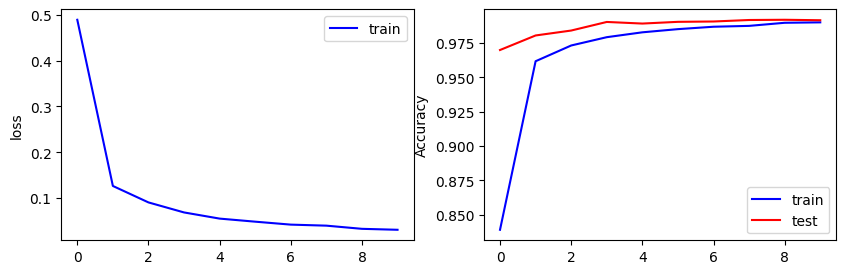

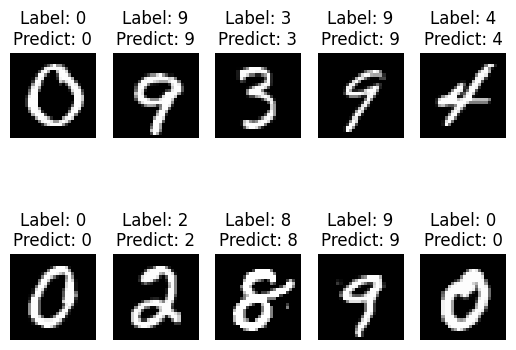

In [9]:
print(train_history.history)
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(loss,color='b',label='train')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.plot(acc,color='b',label='train')
plt.plot(val_acc,color='r',label='test')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
for i in range(10):
    num = np.random.randint(1,10000)

    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(x_test[num],cmap='gray')
    demo = tf.reshape(X_test4D_Normalize[num],(1,28,28))
    y_pred = np.argmax(model.predict(demo))
    plt.title('Label: '+str(y_test[num])+'\nPredict: '+str(y_pred))

plt.show()

### Combinaison d'une interface graphique et d'un modèle formé pour reconnaître des chiffres manuscrits

#### Configure GUI

In [ ]:
from PyQt5.Qt import QWidget, QColor, QPixmap, QIcon, QSize, QCheckBox
from PyQt5.QtWidgets import QHBoxLayout, QVBoxLayout, QPushButton, QSplitter, QComboBox, QLabel, QSpinBox, QFileDialog, QGraphicsView, QGraphicsScene, QGraphicsPixmapItem
from PyQt5.QtGui import QPainter, QPen, QImage, QMouseEvent
from PyQt5.QtCore import Qt, QPoint
from IPython.display import clear_output


class PaintBoard(QGraphicsView):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.scene = QGraphicsScene(self)
        self.setScene(self.scene)

        self.image = QImage(28, 28, QImage.Format_ARGB32)
        self.image.fill(Qt.white)

        self.penColor = QColor("black")
        self.penThickness = 1
        self.drawing = False
        self.lastPoint = QPoint()

        self.setFixedSize(280, 280)
        self.scene.setSceneRect(0, 0, 28, 28)
        self.scale(10, 10)

    def mousePressEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.drawing = True
            self.lastPoint = self.mapToScene(event.pos()).toPoint()

    def mouseMoveEvent(self, event):
        if self.drawing:
            currentPoint = self.mapToScene(event.pos()).toPoint()
            painter = QPainter(self.image)
            pen = QPen(self.penColor, self.penThickness, Qt.SolidLine, Qt.RoundCap, Qt.RoundJoin)
            painter.setPen(pen)
            painter.drawLine(self.lastPoint, currentPoint)
            self.lastPoint = currentPoint
            self.scene.clear()
            self.scene.addPixmap(QPixmap.fromImage(self.image))
            self.update()

    def mouseReleaseEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.drawing = False

    def clear(self):
        self.image.fill(Qt.white)
        self.scene.clear()
        self.scene.addPixmap(QPixmap.fromImage(self.image))

    def changePenColor(self, color):
        self.penColor = QColor(color)

    def changePenThickness(self, thickness):
        self.penThickness = thickness

    def getContentAsQImage(self):
        return self.image


class MainWidget(QWidget):
    def __init__(self, Parent=None):
        super().__init__(Parent)
        self.__InitData()
        self.__InitView()

    def __InitData(self):
        self.__paintBoard = PaintBoard(self)
        self.__colorList = QColor.colorNames()

    def __InitView(self):
        self.setFixedSize(640, 480)
        self.setWindowTitle("Reconnaître des chiffres manuscrits")

        main_layout = QHBoxLayout(self)
        main_layout.setSpacing(10)
        main_layout.addWidget(self.__paintBoard)

        sub_layout = QVBoxLayout()
        sub_layout.setContentsMargins(5, 5, 5, 5)
        splitter = QSplitter(self)
        sub_layout.addWidget(splitter)

        self.__btn_Recognize = QPushButton("Reconnaître")
        self.__btn_Recognize.clicked.connect(self.on_btn_Recognize_Clicked)
        sub_layout.addWidget(self.__btn_Recognize)

        self.__btn_Clear = QPushButton("Nettoyer la table")
        self.__btn_Clear.clicked.connect(self.__paintBoard.clear)
        sub_layout.addWidget(self.__btn_Clear)

        self.__btn_Quit = QPushButton("Quit")
        self.__btn_Quit.clicked.connect(self.close)
        #self.__btn_Quit.clicked.connect(clear_output)
        sub_layout.addWidget(self.__btn_Quit)

        self.__btn_Save = QPushButton("Save")
        self.__btn_Save.clicked.connect(self.on_btn_Save_Clicked)
        sub_layout.addWidget(self.__btn_Save)

        self.__cbtn_Eraser = QCheckBox("Utilisation de la gomme")
        self.__cbtn_Eraser.clicked.connect(self.on_cbtn_Eraser_clicked)
        sub_layout.addWidget(self.__cbtn_Eraser)

        self.__label_penThickness = QLabel(self)
        self.__label_penThickness.setText("Epaisseur de la brosse")
        self.__label_penThickness.setFixedHeight(20)
        sub_layout.addWidget(self.__label_penThickness)

        self.__spinBox_penThickness = QSpinBox(self)
        self.__spinBox_penThickness.setMaximum(20)
        self.__spinBox_penThickness.setMinimum(2)
        self.__spinBox_penThickness.setValue(10)
        self.__spinBox_penThickness.setSingleStep(2)
        self.__spinBox_penThickness.valueChanged.connect(self.on_PenThicknessChange)
        sub_layout.addWidget(self.__spinBox_penThickness)

        self.__label_penColor = QLabel(self)
        self.__label_penColor.setText("Couleur du pinceau")
        self.__label_penColor.setFixedHeight(20)
        sub_layout.addWidget(self.__label_penColor)

        self.__comboBox_penColor = QComboBox(self)
        self.__fillColorList(self.__comboBox_penColor)
        self.__comboBox_penColor.currentIndexChanged.connect(self.on_PenColorChange)
        sub_layout.addWidget(self.__comboBox_penColor)

        main_layout.addLayout(sub_layout)

    def __fillColorList(self, comboBox):
        index_black = 0
        index = 0
        for color in self.__colorList:
            if color == "black":
                index_black = index
            index += 1
            pix = QPixmap(70, 20)
            pix.fill(QColor(color))
            comboBox.addItem(QIcon(pix), None)
            comboBox.setIconSize(QSize(70, 20))
            comboBox.setSizeAdjustPolicy(QComboBox.AdjustToContents)
        comboBox.setCurrentIndex(index_black)
    
    def on_PenColorChange(self):
        color_index = self.__comboBox_penColor.currentIndex()
        color_str = self.__colorList[color_index]
        self.__paintBoard.changePenColor(color_str)

    def on_PenThicknessChange(self):
        penThickness = self.__spinBox_penThickness.value()
        self.__paintBoard.changePenThickness(penThickness)

    def on_btn_Save_Clicked(self):
        savePath = QFileDialog.getSaveFileName(self, 'Save Your Paint', '.\\', '*.png')
        if savePath[0] == "":
            print("Save canceled")
            return
        image = self.__paintBoard.getContentAsQImage()
        image.save(savePath[0])
        print(f"Image saved to: {savePath[0]}")

    def on_cbtn_Eraser_clicked(self):
        if self.__cbtn_Eraser.isChecked():
            self.__paintBoard.changePenColor("white")
        else:
            self.__paintBoard.changePenColor("black")

    def on_btn_Recognize_Clicked(self):
        savePath = "save/img/text.png"
        image = self.__paintBoard.getContentAsQImage()
        image.save(savePath)
        print(f"Image saved to: {savePath}")

        img = keras.preprocessing.image.load_img(savePath, target_size=(28, 28))
        img = img.convert('L')
        x = keras.preprocessing.image.img_to_array(img)
        x = abs(255-x)
        #x = x.reshape(28,28)
        x = np.expand_dims(x, axis=0)  
        x=x/255.0
        new_model = keras.models.load_model('save/modelMnist1.keras')
        prediction = new_model.predict(x)
        output = np.argmax(prediction, axis=1)
        print("Les chiffres manuscrits sont reconnus comme：" + str(output[0]))


if __name__ == "__main__":
    import sys
    from PyQt5.QtWidgets import QApplication
    app = QApplication(sys.argv)
    mainWindow = MainWidget()
    mainWindow.show()
    sys.exit(app.exec_())
